# Assignment 5

### Instructions:

Assignment 5 will cover the MatPlotLib and Seaborn packages. 

The overall goal of this assignment is to ensure that you are comfortable with basic usage of these packages. 

Follow the steps below to ensure that you receive a passing grade:

    - Complete the following tasks within this notebook
    - When finished, convert this notebook to an HTML/PDF file
    - Place the following items into a zip folder:
        - assignment.HTML or assignment.PDF (showing the generated plots)
        - assignment.ipynb 
        - The assignment.ipynb should also write five pdf files (plot-1.pdf, plot-2.pdf ... plot-5.pdf)
    - Name this folder using the naming convention: FIRSTNAME_LASTNAME_ASSIGNMENT5.zip
        - For example, If your name was Jane Doe, then the zipped folder should be called JANE_DOE_ASSIGNMENT5.zip

# Recall the following content from the lesson: 

### **Basic Guidelines for visualizations**

**When making professional level plots, it is very important to adhere to the following guidelines (at minimum).**

* 1) INCLUDE DESCRIPTIVE LABELS AND UNITS: 
  * Always include a **descriptive label** and **units** on any axis-label that you create!
  * A number without units is often meaningless and frustrating for the reader
  * For example, if you plot the price of the S&P 500 along the y-axis, then it is unacceptable to just label it "price".
      * If an outsider looks at your graph they will think, what the heck is price? 
      * Is "price" the price of shoes at walmart in units of british pounds? 
      * Is "price" the average price of a motorcycle at your local used car dealership in units of US pennies?
      * ... what the heck is "price"
    * "price" --> BAD
    * "The instantaneous price of the S&P-500 stock index (US dollars)" --> GOOD
* 2) USE LARGE FONTS: Always use relatively large font sizes for your axis-labels, tic-marks, and other plot annotations.
  * why is this important?  
    *  First off, it makes your plots more accessible to people who have trouble seeing small text.
    *  Second, often your plots will be used in presentations. Therefore, your plots need to be legible, even from the back of the room.
  * (fontsize=12 --> BAD)(fontsize=20 --> GOOD)
  * Note: Don't take it too far by making your axis labels comically large.
* 3) DONT OVERPLOT: Over plotting is when you try to cram too much information into a single plot. 
  * Usually the result is very hard for the reader to digest. 
  * Typically it is best to keep your graphics relatively simple, conveying only 1 or 2 messages.  
* 4) ALWAYS HAVE A MESSAGE: Never include "plots for plots sake". 
  * Graphics are almost always part of some larger narrative. 
  * If a particular plot doesn't strengthen the narrative, and add meaningful value, then it should not be included.
  
**Failure to adhere to these guidelines will consistently lose you points in any class you take in the DSAN program**. 


## 1. Seaborn and MatPlotLib

* MPL and Seaborn are so interdependent that you can practice them simultaneously, as is the case in the assignment below.

* IMPORTANT: MAKE SURE EVERY PLOT ADHERES TO THE VISUALIZATION GUIDELINES ABOVE
  * i.e. don't use the default values, customize the graphs so they have large fonts, descriptive axis labels, and units. 
  
* **Assignment**: Using the Penguins database provided with seaborn, generate the following plots using Seaborn, and then customize them using MPL commands.


In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:

df = sns.load_dataset("penguins")
print(df)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2     

## Plot-1: 

Use sns.relplot() to reproduce the plot in the "plot-1-original.pdf"

**Hint** 
* sns.set_theme(style='white', palette="Pastel1")
  
* Always use print(type(g)) to determine what type of object you are dealing with
* font size = 18
* To save use plt.savefig('plot-1.pdf', bbox_inches='tight')
* g=sns.relplot() stores the MPL axes object in g.axes[i,j], starting with i,j=0,0
* The following commands can be used to modify the legend of <class 'seaborn.axisgrid.FacetGrid'> object
  * plt.setp(g._legend.get_texts(), fontsize=FS)
  * plt.setp(g._legend.get_title(), fontsize=FS)




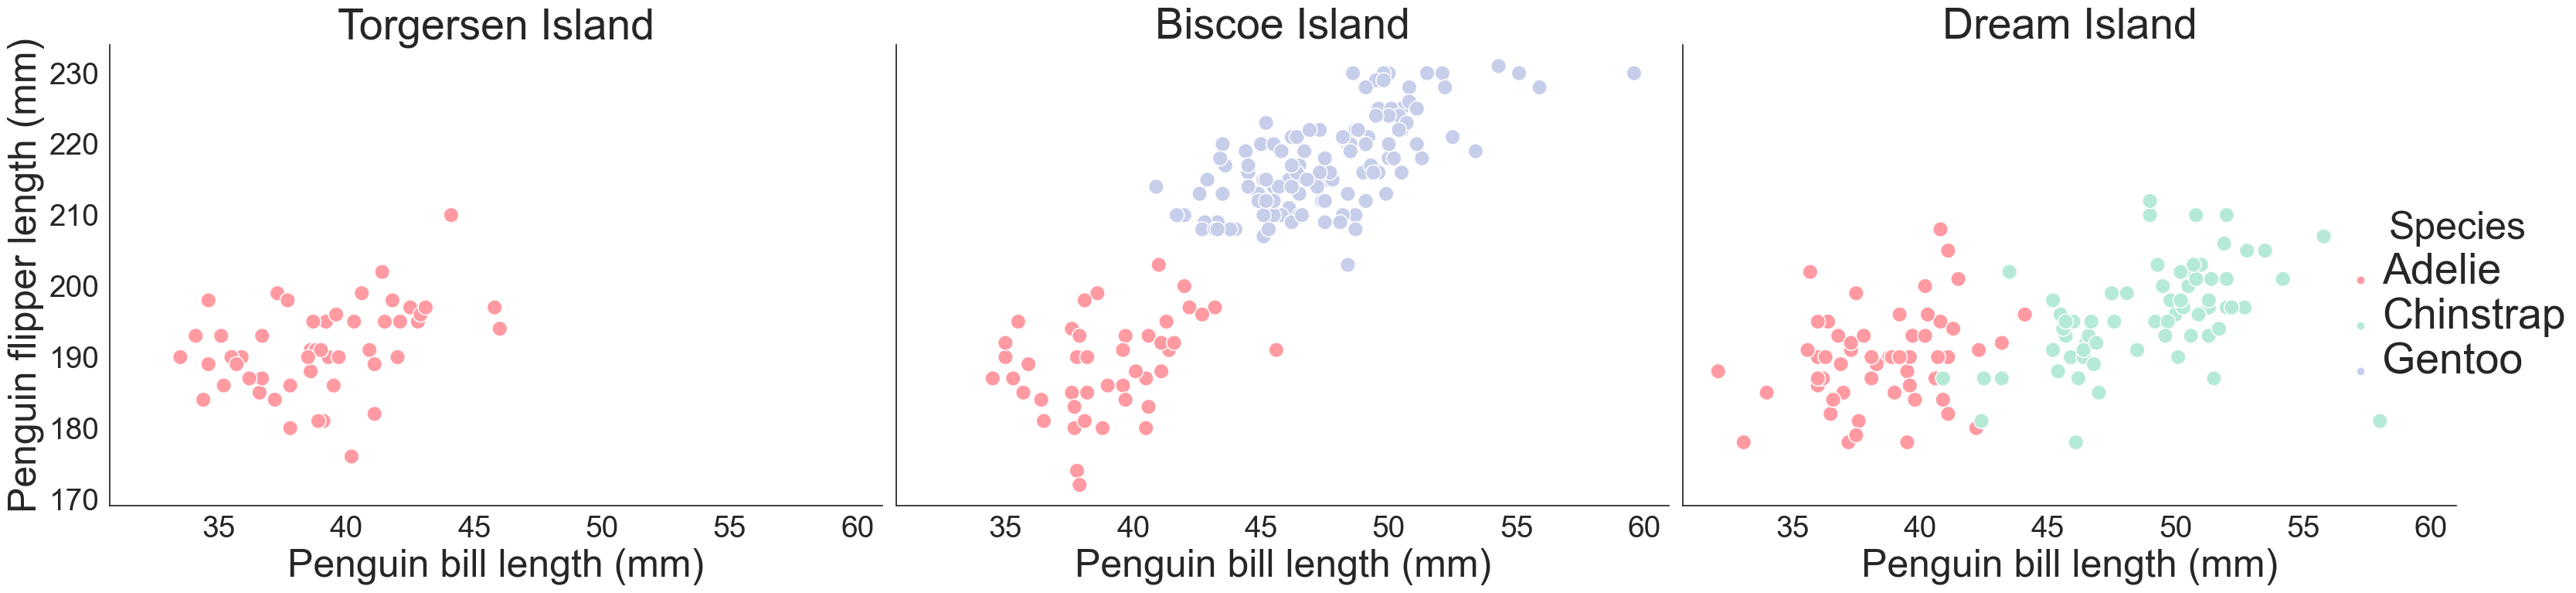

In [59]:
# INSERT YOUR SOLUTION HERE

sns.set_theme(style='white', palette="Pastel1")

g = sns.relplot(
    data=df,
    x="bill_length_mm", y="flipper_length_mm",
    col="island", hue="species",
    kind="scatter",
    palette=["#FF9AA2", "#B5EAD7", "#C7CEEA"],
    height=7, aspect=1.5,
    s=200
)

for ax in g.axes.flat:
    ax.tick_params(axis='both', labelsize=28)
    
g.set_titles("{col_name} Island", size=40)
g.set_axis_labels("Penguin bill length (mm)", "Penguin flipper length (mm)",fontsize=36)

# Adjust the legend
g._legend.set_title("Species")
plt.setp(g._legend.get_texts(), fontsize='40')  # Adjust legend text font size
plt.setp(g._legend.get_title(), fontsize='36')  # Adjust legend title font size


plt.show()


## Plot-2: 

Use sns.jointplot() to reproduce the plot in the "plot-2-original.pdf"

**Hint**
* You can modify the MPL axes object for <class 'matplotlib.axes._subplots.AxesSubplot'> objects using the following command
  * g.ax_joint.INSERT_MPL_COMMAND
<br/><br/>
* font size = 18




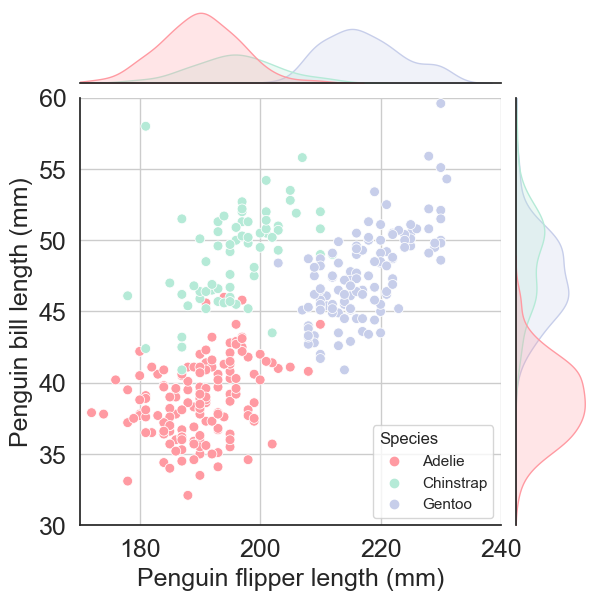

In [66]:
# INSERT YOUR SOLUTION HERE

g = sns.jointplot(
    data=df,
    x="flipper_length_mm",
    y="bill_length_mm",
    hue="species",
    kind="scatter",
    palette=["#FF9AA2", "#B5EAD7", "#C7CEEA"],
    s=50
)

# Set x and y axes limits
g.ax_joint.set_xlim(170, 240)
g.ax_joint.set_ylim(30, 60)

# Set axis labels with desired fontsize
g.set_axis_labels("Penguin flipper length (mm)", "Penguin bill length (mm)", fontsize=28)

# Adding a grid for better readability
g.ax_joint.grid(True)

# Adjust tick labels size on main axes
g.ax_joint.tick_params(axis='both', labelsize=18)

# Adjust font sizes for axis labels
g.ax_joint.set_xlabel(g.ax_joint.get_xlabel(), fontsize=18)
g.ax_joint.set_ylabel(g.ax_joint.get_ylabel(), fontsize=18)

# Adjust font size for marginal histograms/ticks if present
g.ax_marg_x.tick_params(axis='x', labelsize=18)
g.ax_marg_y.tick_params(axis='y', labelsize=18)

# Configure the legend with the title
legend = g.ax_joint.get_legend()
if legend:
    legend.set_title('Species', prop={'size': 12})
    legend._legend_box.align = "left"

# Show the plot
plt.show()

## Plot-3: 

Use sns.catplot() with kind="violin" to reproduce the plot in the "plot-3-original.pdf"

**Hint**
* sns.catplot() outputs a <class 'seaborn.axisgrid.FacetGrid'> type object
  * Therefore, various lines of code from plot-1 can be recycled


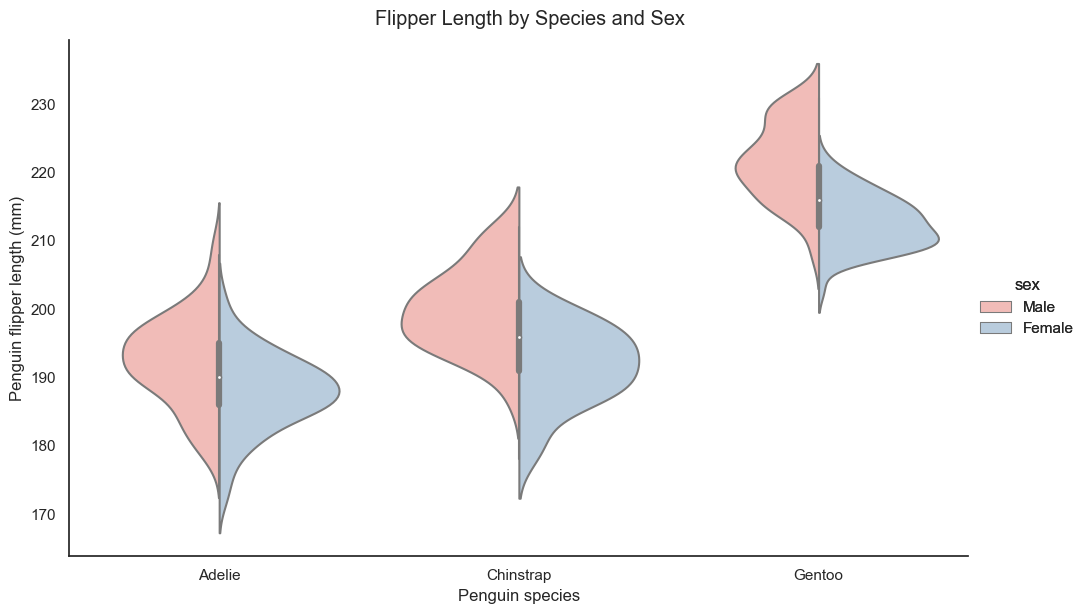

In [71]:
# INSERT YOUR SOLUTION HERE

violin_plot = sns.catplot(
    data=df, 
    x="species", 
    y="flipper_length_mm", 
    hue="sex", 
    kind="violin",
    split=True,
    height=6,
    aspect=1.5
)

# Set the labels and title
violin_plot.set_axis_labels("Penguin species", "Penguin flipper length (mm)")
violin_plot.add_legend(title="sex")
violin_plot.fig.suptitle("Flipper Length by Species and Sex", y=1.02)

plt.show()

## Plot-4: 

Use sns.catplot() with kind="swarm" to reproduce the plot in the "plot-4-original.pdf" 

**Hint**: you can recycle plot-3 entirely and just change one line

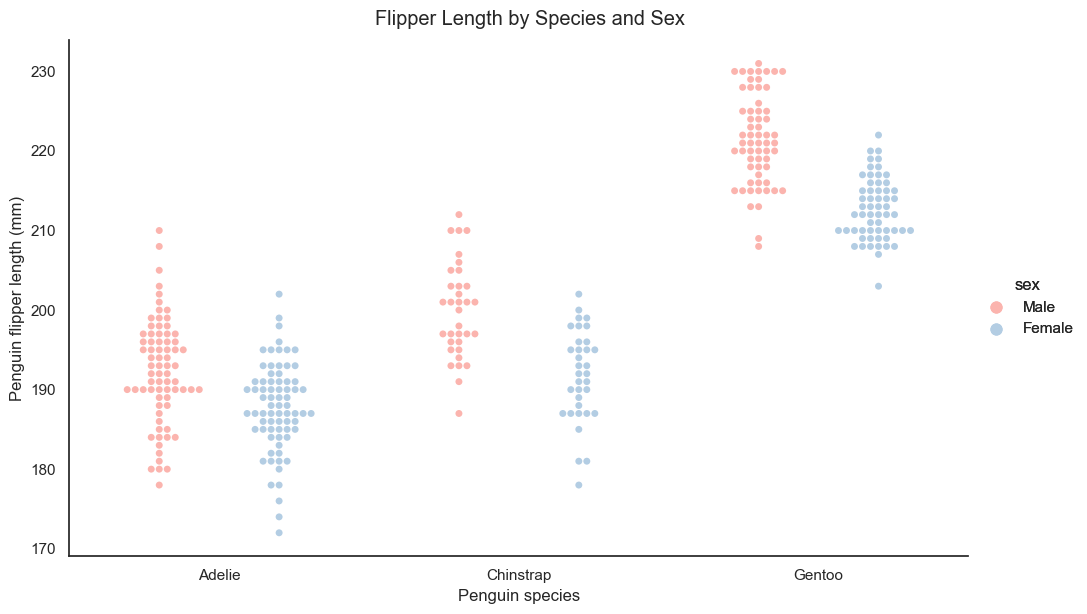

In [72]:
# INSERT YOUR SOLUTION HERE

swarm_plot = sns.catplot(
    data=df, 
    x="species", 
    y="flipper_length_mm", 
    hue="sex", 
    dodge=True,
    kind="swarm",
    height=6,
    aspect=1.5
)

# Set the labels and title
swarm_plot.set_axis_labels("Penguin species", "Penguin flipper length (mm)")
swarm_plot.add_legend(title="sex")
swarm_plot.fig.suptitle("Flipper Length by Species and Sex", y=1.02)

# Show the plot
plt.show()

## Plot-5: 

Use sns.pairplot() to reproduce the plot in the "plot-5-original.pdf"

**Hint**
* sns.pairplot() returns a <class 'seaborn.axisgrid.PairGrid'> type object
  * g=sns.pairplot() stores the MPL axes object in g.axes[i,j], starting with i,j=0,0 (similar to plot-1)
* The font legend can be modified using the same method as plot-1


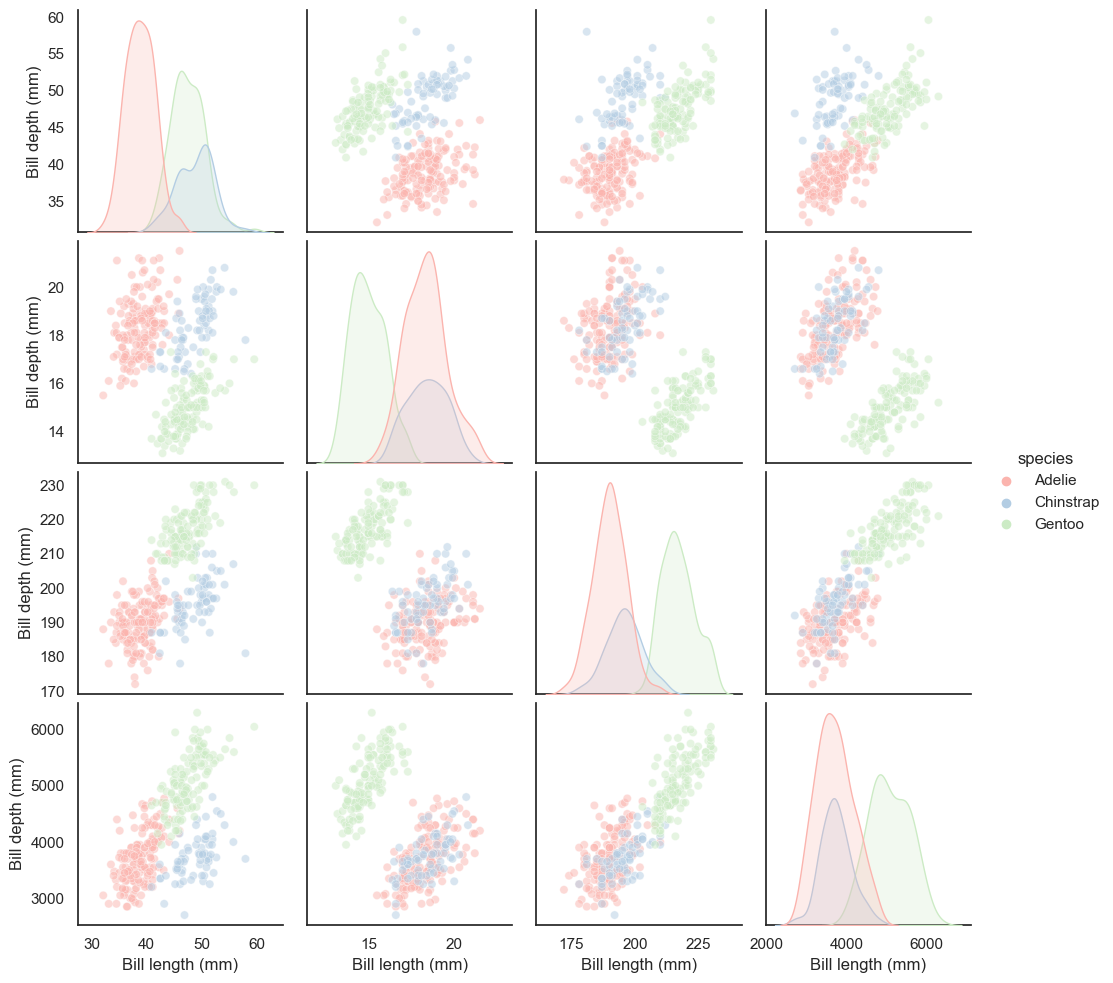

In [74]:
# INSERT YOUR SOLUTION HERE

pair_plot = sns.pairplot(
    data=df, 
    hue="species", 
    height=2.5,
    plot_kws={'alpha':0.5}
)

# Adjust legend font size
for ax in pair_plot.axes.flat:
    if ax.get_legend():
        ax.get_legend().set_title("species")
        plt.setp(ax.get_legend().get_texts(), fontsize='small')

# Set the axis labels
pair_plot.set(xlabel='Bill length (mm)', ylabel='Bill depth (mm)')

plt.show()